In [1]:
import boto3
import botocore
from iterdub import iterdub as ib
import matplotlib.pyplot as plt
import pandas as pd
from pandas.util import hash_pandas_object
import seaborn as sns

In [2]:
from dishpylib.pyanalysis import tee_plot

# get data

In [3]:
s3_handle = boto3.resource(
    's3',
    region_name="us-east-2",
    config=botocore.config.Config(
        signature_version=botocore.UNSIGNED,
    ),
)
bucket_handle = s3_handle.Bucket('prq49')

series_profiles, = bucket_handle.objects.filter(
    Prefix=f'endeavor=16/stage=8+what=elaborated/',
)

In [4]:
df = pd.read_csv(
    f's3://prq49/{series_profiles.key}',
    compression='xz',
)
dfdigest = '{:x}'.format( hash_pandas_object( df ).sum() )
dfdigest

'581a93929506b064'

In [5]:
for stint in df['Stint'].unique():
    exec(f'df{stint} = df[ df["Stint"] == {stint} ]')

# how does fitness change over time?

outplots/bucket=prq49+endeavor=16+hue=predecessor-battle-outcome+transform=identity+viz=countplot+x=stint+_dfdigest=581a93929506b064+ext=.pdf
outplots/bucket=prq49+endeavor=16+hue=predecessor-battle-outcome+transform=identity+viz=countplot+x=stint+_dfdigest=581a93929506b064+ext=.png


<AxesSubplot:xlabel='Stint', ylabel='count'>

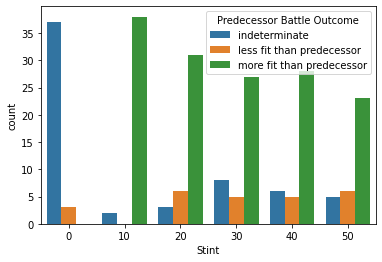

In [6]:
tee_plot(
    sns.countplot,
    data=df,
    x='Stint',
    hue='Predecessor Battle Outcome',
    outattrs={
        'bucket' : ib.dub( df['Treatment bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'identity',
        '_dfdigest' : dfdigest,
    },
)

outplots/bucket=prq49+endeavor=16+hue=predecessor-battle-outcome+transform=identity+viz=hline-boxplot+x=stint+y=fitness-complexity-delta+_dfdigest=581a93929506b064+ext=.pdf
outplots/bucket=prq49+endeavor=16+hue=predecessor-battle-outcome+transform=identity+viz=hline-boxplot+x=stint+y=fitness-complexity-delta+_dfdigest=581a93929506b064+ext=.png


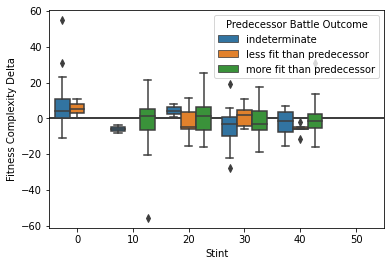

In [7]:
def hline_boxplot(*args, **kwargs):
    plt.axhline(
        0,
        c='k',
        zorder=-1,
    )
    sns.boxplot(
        *args,
        **kwargs,
    )

tee_plot(
    hline_boxplot,
    data=df,
    x='Stint',
    y='Fitness Complexity Delta',
    hue='Predecessor Battle Outcome',
    outattrs={
        'bucket' : ib.dub( df['Treatment bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'identity',        
        '_dfdigest' : dfdigest,
    },    
)

outplots/bucket=prq49+endeavor=16+hue=predecessor-battle-outcome+transform=identity+viz=barplot+x=stint+y=fitness-complexity+_dfdigest=581a93929506b064+ext=.pdf
outplots/bucket=prq49+endeavor=16+hue=predecessor-battle-outcome+transform=identity+viz=barplot+x=stint+y=fitness-complexity+_dfdigest=581a93929506b064+ext=.png


<AxesSubplot:xlabel='Stint', ylabel='Fitness Complexity'>

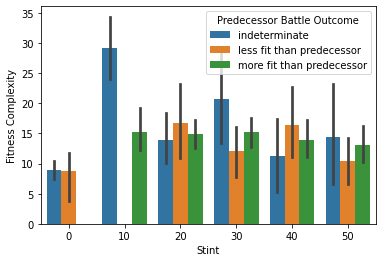

In [8]:
tee_plot(
    sns.barplot,
    data=df,
    x='Stint',
    y='Fitness Complexity',
    hue='Predecessor Battle Outcome',
    outattrs={
        'bucket' : ib.dub( df['Treatment bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'identity',
        '_dfdigest' : dfdigest,
    },
)